In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

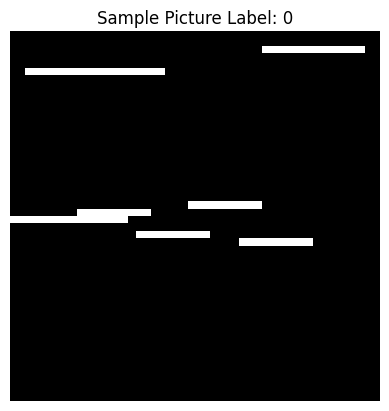

In [2]:
# a) Generation of the data
def generate_dataset(num_samples=1000):
    images = []
    labels = []

    for _ in range(num_samples):
        image = np.zeros((50, 50, 1), dtype=np.uint8)
        num_bars = 10
        is_vertical = np.random.randint(2)  # 0 for horizontal, 1 for vertical

        for _ in range(num_bars):
            bar_length = 10
            x_start = np.random.randint(41)  # Random starting position
            y_start = np.random.randint(41) if is_vertical else np.random.randint(41 - bar_length)

            if is_vertical:
                image[y_start:y_start + bar_length, x_start, 0] = 255
            else:
                image[y_start, x_start:x_start + bar_length, 0] = 255

        images.append(image)
        labels.append(is_vertical)
        
    return np.array(images), np.array(labels)


# Show picture to check
images, labels = generate_dataset()
plt.imshow(images[0], cmap='gray')
plt.title(f"Sample Picture Label: {labels[0]}")
plt.axis('off')
plt.show()

In [3]:
# b) Build the simplest possible CNN
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=1, kernel_size=(5, 5), input_shape=(50, 50, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))

    return model

In [4]:
# Generate datasets
train_images, train_labels = generate_dataset(1000)
val_images, val_labels = generate_dataset(1000)

# Build and compile the model
model = build_cnn()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x=train_images, y=train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
32/32 [==============================] - 3s 22ms/step - loss: 28.3690 - accuracy: 0.5870 - val_loss: 16.7580 - val_accuracy: 0.6990
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 13.8027 - accuracy: 0.7250 - val_loss: 9.5443 - val_accuracy: 0.7840
Epoch 3/20
32/32 [==============================] - 0s 10ms/step - loss: 8.0660 - accuracy: 0.8000 - val_loss: 6.1504 - val_accuracy: 0.8320
Epoch 4/20
32/32 [==============================] - 0s 10ms/step - loss: 5.4519 - accuracy: 0.8490 - val_loss: 4.2909 - val_accuracy: 0.8640
Epoch 5/20
32/32 [==============================] - 0s 10ms/step - loss: 3.8531 - accuracy: 0.8730 - val_loss: 3.1928 - val_accuracy: 0.8890
Epoch 6/20
32/32 [==============================] - 0s 11ms/step - loss: 2.8677 - accuracy: 0.8910 - val_loss: 2.4559 - val_accuracy: 0.9110
Epoch 7/20
32/32 [==============================] - 0s 10ms/step - loss: 2.1400 - accuracy: 0.9120 - val_loss: 1.9901 - val_accuracy: 0.9190
Epoch 8/20

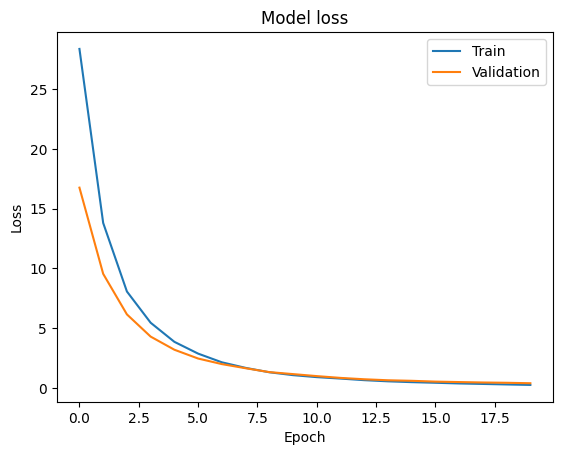

In [5]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

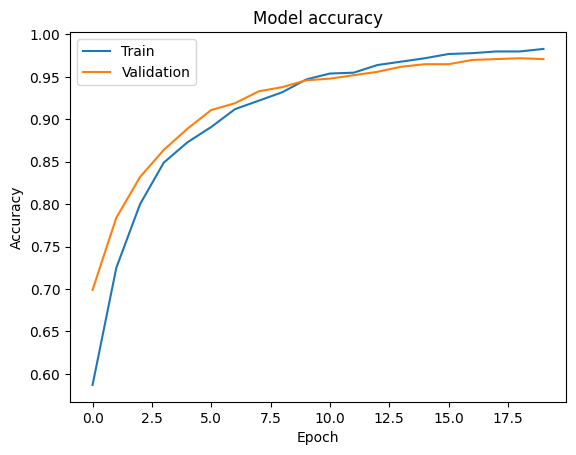

In [6]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

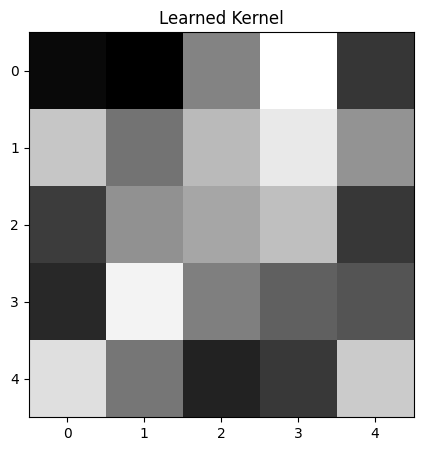

In [7]:
# c) Visualize the learned kernel
weights = model.get_weights()[0]
plt.figure(figsize=(5, 5))
plt.imshow(weights[:, :, 0, 0], cmap='gray', interpolation='nearest')
plt.title('Learned Kernel')
plt.show()